# 1.) Preprocess your data into scaled input variables and an output variable


In [3]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [4]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [5]:
df = pd.read_csv("/content/gdrive/MyDrive/CLV.csv")

In [6]:
x = df.drop(df.columns[[0,1]],axis = 1)
y = df['Customer Lifetime Value']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# 2.) Run a GridSearch CV on at least 10 possible combinations of hyper parameters 

In [10]:
from sklearn.neural_network import MLPRegressor 

In [11]:
from sklearn.model_selection import GridSearchCV

In [12]:
clf = MLPRegressor()

params = { 
    'hidden_layer_sizes': [(10,), (5,20,), (10,50,), (10,100,10,)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01]
}
    


In [16]:
grid = GridSearchCV (clf,params, cv = 5)
grid.fit (x_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:

GridSearchCV(cv=5, estimator=MLPRegressor(),
             param_grid={'activation': ['relu', 'logistic'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (5, 20), (10, 50),
                                                (10, 100, 10)]})

In [18]:
print("Best hyperparameters: ", grid.best_params_)
print("Best score: ", grid.best_score_)

Best hyperparameters:  {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (10, 100, 10)}
Best score:  0.07387173884503469


# 3.) Train a model with the optimal solution from GridSearch

In [22]:
clf_test = MLPRegressor(**grid.best_params_).fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [27]:
print("Test set score: " + str(clf_test.score(x_test, y_test)))

Test set score: 0.07528210120436618


# 4.) What are the in-sample and out of sample MSEs

In [29]:
 from sklearn.metrics import mean_squared_error
 clf.fit(x_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()

In [32]:
y_pred_train = clf.predict(x_train)
in_sample_mse = mean_squared_error(y_train, y_pred_train)
print("In-sample MSE: {:.2f}".format(in_sample_mse))

In-sample MSE: 46154081.54


In [34]:
y_pred_test = clf.predict(x_test)
out_of_sample_mse = mean_squared_error(y_test, y_pred_test)
print("Out-sample MSE: {:.2f}".format(out_of_sample_mse))

In-sample MSE: 48519433.69


# 5.) Build a Keras with the architecture defined by GridSearchCV

In [35]:
import keras.models
from keras.optimizers import Adam 
from keras.models import Sequential 
from keras.layers import Dense

In [36]:
model = Sequential()
model.add(Dense(12, input_dim = x_train.shape[1], activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(1, activation = 'softmax'))

In [37]:
model.compile(loss = 'mse', optimizer = Adam(lr=0.01))
model.fit(x_train, y_train, batch_size = 32, epochs = 100)

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/100
200/200 [==============================] - 2s 6ms/step - loss: 110678256.0000
Epoch 2/100
200/200 [==============================] - 1s 5ms/step - loss: 110678240.0000
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 110678288.0000
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 110678288.0000
Epoch 5/100
200/200 [==============================] - 1s 3ms/step - loss: 110678312.0000
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 110678272.0000
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 110678280.0000
Epoch 8/100
200/200 [==============================] - 0s 2ms/step - loss: 110678256.0000
Epoch 9/100
200/200 [==============================] - 0s 2ms/step - loss: 110678280.0000
Epoch 10/100
200/200 [==============================] - 0s 2ms/step - loss: 110678280.0000
Epoch 11/100
200/200 [==============================] - 0s 2ms/step - loss: 110678280.0000
Epoch 12

# 6.) Make two visualizations of your NN using “plot_model” and “ann_viz”

In [38]:
from keras.utils.vis_utils import plot_model

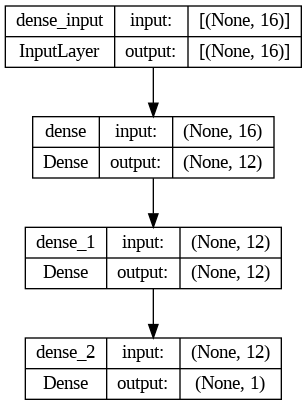

In [39]:
plot_model(model,show_shapes = True)

In [40]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=1f82c3022f819a7bfc9c71c4318a119e166a2ad7b1c9e250f9fac434e1ea4195
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


In [45]:
from ann_visualizer.visualize import ann_viz
ann_viz(model,title = "CLV NN ViZ")

In [46]:
## Ann_viz cannot be plotted correctly 